In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SequentialFeatureSelector

In [2]:
# Carregar o dataset Iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
X = df
y = data.target

# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
# Definir o modelo de aprendizado (neste caso, KNN)
knn = KNeighborsClassifier(n_neighbors=3)

# Implementar a abordagem wrapper com busca sequencial
sfs = SequentialFeatureSelector(knn, n_features_to_select=2, direction='forward').fit(X_train, y_train)

# Verificar quais atributos foram selecionados
selected_features = X.columns[sfs.get_support()]

print(f"Atributos selecionados: {selected_features.tolist()}")

Atributos selecionados: ['sepal length (cm)', 'petal length (cm)']


In [7]:
# Treinar o modelo com os atributos selecionados
knn.fit(X_train[selected_features], y_train)# Treinar o modelo com os atributos selecionados

# Fazer previsões no conjunto de teste
y_pred = knn.predict(X_test[selected_features])

# Avaliar a performance no conjunto de teste
score = knn.score(X_test[selected_features], y_test)
print(f"Acurácia no conjunto de teste: {score:.4f}")


Acurácia no conjunto de teste: 0.9556


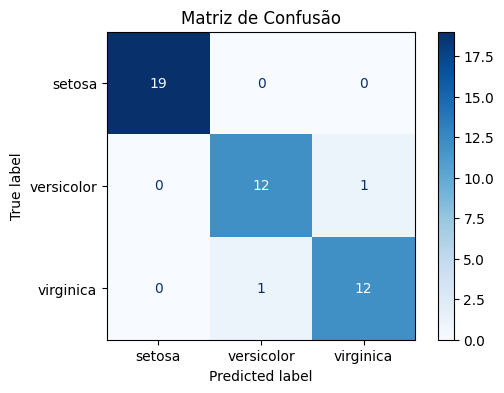

In [11]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Avaliar a performance no conjunto de teste usando a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Exibir a matriz de confusão como um gráfico
plt.figure(figsize=(6, 4))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names).plot(cmap='Blues', ax=plt.gca())
plt.title("Matriz de Confusão")
plt.show()



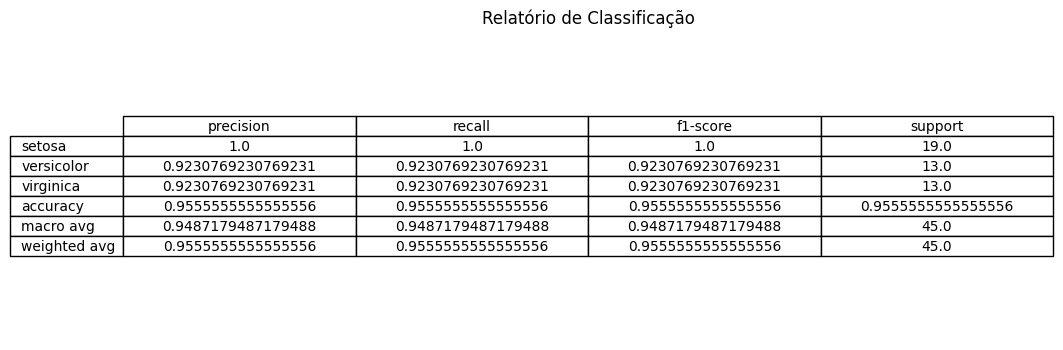

In [13]:
# Gerar o relatório de classificação
report = classification_report(y_test, y_pred, target_names=data.target_names, output_dict=True)

# Converter o relatório para um DataFrame do pandas
report_df = pd.DataFrame(report).transpose()

# Plotar o relatório de classificação como uma tabela gráfica
plt.figure(figsize=(10, 4))
plt.axis('off')
table = plt.table(cellText=report_df.values, colLabels=report_df.columns, rowLabels=report_df.index, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
plt.title("Relatório de Classificação")
plt.show()